# <center><font color='orange'>Analyzing the Instagram Data</font><center>

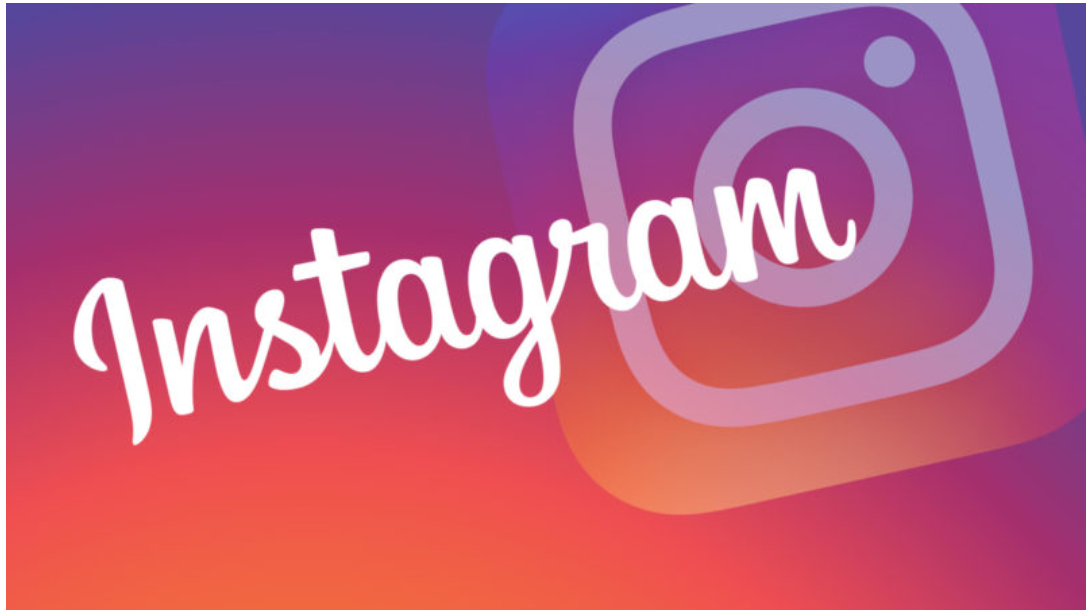

Here in this notebook, I have analyzed the Play House Communication Instagram data to derive valuable insights that can help to make data-driven business decisions. Grab a coke bottle and a snack as I take you on this adventrous ride. 

### Importing Packages

There are some packages that are really important in for data exploration and machine learning, this section shows the packages used for this project

In [144]:
import pandas as pd
import seaborn as sns
import numpy as np
import os 
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, CatBoostRegressor
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

### Importing data

The Instagram data in csv format was read in with the pandas package

In [145]:
insta = pd.read_csv(r'..\..\original_datasets\Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Instagram.csv',low_memory = False, thousands = ',',float_precision = 'legacy')

### Exploratory data analysis 1

I have splitted my exploration into two phases. This first phase shows the analysis and derivation of basic information from the data.


In [146]:
#deriving shape of file
insta.shape

(10000, 147)

In [147]:
#deriving more information about file size, number of columns etc
insta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 147 entries, Date to Tags
dtypes: float64(131), int64(5), object(11)
memory usage: 11.2+ MB


In [148]:
#printing total number of columns
print('Total number of columns :',insta.shape[1])

Total number of columns : 147


In [149]:
#printing total number of rows
print('Total number of rows :',insta.shape[0])

Total number of rows : 10000


In [150]:
#identifying number of columns that are numeric
number_of_numeric_columns =  len(insta.select_dtypes('number').columns.to_list())
number_of_numeric_columns

136

In [151]:
#identifying number of columns that are non-numeric
number_of_non_numeric_columns =  len(insta.select_dtypes('object').columns.to_list())
number_of_non_numeric_columns

11

In [152]:
#identifying colummns percentage of null values present
null_values_percent = insta.isna().sum()/insta.shape[0] * 100
null_values_percent

Date                                             0.00
Post ID                                          0.00
Network                                          0.00
Post Type                                        0.00
Content Type                                     0.00
Profile                                          0.00
Sent by                                          0.00
Link                                             0.00
Post                                             0.11
Linked Content                                 100.00
Impressions                                     14.84
Organic Impressions                             14.84
Viral Impressions                              100.00
Non-viral Impressions                          100.00
Paid Impressions                               100.00
Fan Impressions                                100.00
Fan Organic Impressions                        100.00
Fan Paid Impressions                           100.00
Non-fan Impressions         

In [153]:
(insta.isna().sum()/insta.shape[0] * 100)[(insta.isna().sum()/insta.shape[0] * 100) > 50]

Linked Content                                 100.00
Viral Impressions                              100.00
Non-viral Impressions                          100.00
Paid Impressions                               100.00
Fan Impressions                                100.00
Fan Organic Impressions                        100.00
Fan Paid Impressions                           100.00
Non-fan Impressions                            100.00
Non-fan Organic Impressions                    100.00
Non-fan Paid Impressions                       100.00
Viral Reach                                    100.00
Non-viral Reach                                100.00
Paid Reach                                     100.00
Fan Reach                                      100.00
Fan Paid Reach                                 100.00
Potential Reach                                100.00
Dislikes                                       100.00
Love Reactions                                 100.00
Haha Reactions              

In [154]:
#identifying duplicated values
insta.duplicated().any()

False

In [155]:
#taking a statistical overview of columns
insta.describe()

,Post ID,Linked Content,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Paid Impressions,Fan Impressions,Fan Organic Impressions,Fan Paid Impressions,Non-fan Impressions,Non-fan Organic Impressions,Non-fan Paid Impressions,Reach,Organic Reach,Viral Reach,Non-viral Reach,Paid Reach,Fan Reach,Fan Paid Reach,Potential Reach,Engagements,Reactions,Likes,Dislikes,Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions,Comments,Shares,Saves,Click-Through Rate,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Post Photo View Clicks,Post Video Play Clicks,Other Engagements,Answers,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Negative Feedback,bit.ly Link Clicks,Engaged Users,Engaged Fans,Users Talking About This,Unique Reactions,Unique Comments,Unique Shares,Unique Answers,Unique Post Clicks,Unique Post Link Clicks,Unique Post Photo View Clicks,Unique Post Video Play Clicks,Unique Other Post Clicks,Unique Negative Feedback,Subscribers Gained from Video,Annotation Clicks,Card Clicks,Video Views,Media Views,Organic Video Views,Paid Video Views,Partial Video Views,Organic Partial Video Views,Paid Partial Video Views,Full Video Views,Full Video View Rate,Follow Video Views,For You Video Views,Hashtag Video Views,Business Account Video Views,Sound Video Views,Unspecified Video Views,Organic Full Video Views,Paid Full Video Views,Autoplay Video Views,Click to Play Video Views,Sound on Video Views,Sound off Video Views,10-Second Video Views,Organic 10-Second Video Views,Paid 10-Second Video Views,Autoplay 10-Second Video Views,Click to Play 10-Second Video Views,Sound on 10-Second Video Views,Sound off 10-Second Video Views,Autoplay Partial Video Views,Click to Play Partial Video Views,Autoplay Full Video Views,Click to Play Full Video Views,95% Video Views,Organic 95% Video Views,Paid 95% Video Views,Video Length (Seconds),Average Video Time Watched (Seconds),Video View Time (Seconds),Organic Video View Time (Seconds),Paid Video View Time (Seconds),Unique Video Views,Unique Organic Video Views,Unique Paid Video Views,Unique 10-Second Video Views,Unique Full Video Views,Unique Organic 95% Video Views,Unique Paid 95% Video Views,Video Ad Break Ad Impressions,Video Ad Break Ad Earnings,Video Ad Break Ad Cost per Impression (CPM),YouTube Premium Views,Estimated Minutes Watched,Estimated Premium Minutes Watched,Story Taps Back,Story Taps Forward,Story Exits,Story Replies,Video Added to Playlists,Subscribers Lost from Video,Video Removed from Playlists,Annotation Impressions,Annotation Clickable Impressions,Annotation Closable Impressions,Annotation Closes,Card Impressions,Card Teaser Impressions,Card Teaser Clicks,Poll Votes
count,1.000000e+04,0.0,8516.000000,8516.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8516.000000,8516.000000,0.0,0.0,0.0,0.0,0.0,0.0,10000.000000,10000.000000,10000.000000,0.0,0.0,0.0,0.0,0.0,0.0,10000.000000,0.0,8516.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1355.000000,0.0,1355.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.793491e+16,NaN,2273.855214,2273.855214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1503.111790,1503.111790,NaN,NaN,NaN,NaN,NaN,NaN,100.463100,90.886800,90.886800,NaN,NaN,NaN,NaN,NaN,NaN,7.831000,NaN,2.049436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.576384,NaN,599.576384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [156]:
#checking unique values in columns like Network, post type, content type, profile, tags

In [157]:
insta['Network'].unique()

array(['Instagram'], dtype=object)

In [158]:
insta['Post Type'].unique()

array(['Post'], dtype=object)

In [159]:
insta['Content Type'].unique()

array(['Carousel', 'Photo', 'Video'], dtype=object)

In [160]:
insta['Profile'].unique()

array(['stanbicibtc'], dtype=object)

In [161]:
#20 random tags in the data
insta['Tags'].unique()[:20]

array([nan, 'YLS', 'CHNW Mass Retail, Reward4Saving', 'CIB Posts',
       'Sustainability Saturday', 'Together4ALimb', 'Weekly Wealth Posts',
       'BCC', 'Infrastructure Fund, Weekly Wealth Posts',
       'CHNW Mass Retail', 'BCC, BCC Thematic Campaign',
       'Pension, Pension Extraordinary Campaign, Weekly Wealth Posts',
       'Fuze Festival, Weekly Wealth Posts',
       'Life Insurance Campaign, Weekly Wealth Posts', 'Reward4Saving',
       'wedding series', 'Trustees Posts, Weekly Wealth Posts',
       'BCC, Trade Export Webinar', 'SME Loan',
       'BCC, BCC Thematic Campaign, CIB Brand Campaign, CIB Posts'],
      dtype=object)

### Exploratory Data Analysis 2

In this phase 2 of the exploratory data analysis, i performed more exploration and cleaned the data. In this section, I used the groupby method in pandas and also made a lot of visualizations 

#### Data Cleaning and Analysis

In [162]:
insta['Engagement Rate (per Impression)'].head()

0    4.89%
1    6.04%
2    3.48%
3    4.48%
4    6.58%
Name: Engagement Rate (per Impression), dtype: object

The column above has % sign in its values which is not good for python. Usually the % sign has to be removed. A number of columns in this dataset have the % sign and they need to be removed. The below code identifies and removes them

In [163]:
# Identify columns with 'rate' in the column name
rate_columns = [col for col in insta.columns if r'Rate' in col]

# Remove percent signs and convert to numeric
for col in rate_columns:
    insta[col] = insta[col].astype(str).str.rstrip('%')
    insta[col] = insta[col].str.replace(',','').astype(float)


Next was to identify columns that have zero missing values and they are shown belowm

In [164]:
null_values_percent[null_values_percent == 0]

Date            0.0
Post ID         0.0
Network         0.0
Post Type       0.0
Content Type    0.0
Profile         0.0
Sent by         0.0
Link            0.0
Engagements     0.0
Reactions       0.0
Likes           0.0
Comments        0.0
dtype: float64

Also, columns that contain exactly 100% null values were also identified and removed from the entire dataset since they had no meaningful information

In [165]:
totally_null_columns = null_values_percent[null_values_percent == 100].index.to_list()
totally_null_columns

['Linked Content',
 'Viral Impressions',
 'Non-viral Impressions',
 'Paid Impressions',
 'Fan Impressions',
 'Fan Organic Impressions',
 'Fan Paid Impressions',
 'Non-fan Impressions',
 'Non-fan Organic Impressions',
 'Non-fan Paid Impressions',
 'Viral Reach',
 'Non-viral Reach',
 'Paid Reach',
 'Fan Reach',
 'Fan Paid Reach',
 'Potential Reach',
 'Dislikes',
 'Love Reactions',
 'Haha Reactions',
 'Wow Reactions',
 'Sad Reactions',
 'Angry Reactions',
 'Shares',
 'Click-Through Rate',
 'Post Link Clicks',
 'Other Post Clicks',
 'Post Clicks (All)',
 'Post Media Clicks',
 'Post Hashtag Clicks',
 'Post Detail Expand Clicks',
 'Profile Clicks',
 'Post Photo View Clicks',
 'Post Video Play Clicks',
 'Other Engagements',
 'Answers',
 'App Engagements',
 'App Install Attempts',
 'App Opens',
 'Follows from Post',
 'Unfollows from Post',
 'Negative Feedback',
 'bit.ly Link Clicks',
 'Engaged Users',
 'Engaged Fans',
 'Users Talking About This',
 'Unique Reactions',
 'Unique Comments',
 'Uniq

In [166]:
insta = insta.drop(totally_null_columns, axis =1)
insta.shape[1]

23

In [167]:
#checking sum of null values in 10 random columns
insta.isna().sum().sample(10)

Sent by             0
Video Views      8645
Post Type           0
Link                0
Likes               0
Impressions      1484
Reach            1484
Tags             8454
Organic Reach    1484
Post               11
dtype: int64

As part of the data cleaning process, it is important to ensure that the date column is in the datetime format so more features and be engineered in the feature engineering section and also to derive more insights in the exploratory phase section

In [168]:
insta['Date'] = pd.to_datetime(insta['Date'])

In [169]:
insta['Date'].dtype #it simply means datetime

dtype('<M8[ns]')

In [170]:
#sorting the entire dataset by the date in ascending order
insta = insta.sort_values(by = ['Date'], ascending = True)

After removing the completely empty columns, it was discovered that some other columns also had a high percentage of null values. As is the usual practice in data science, when there are more than 50% null values, the best thing is to drop it. So, I have identified them and also dropped them in the next cells

In [171]:
(insta.isna().sum()/insta.shape[0] * 100)[(insta.isna().sum()/insta.shape[0] * 100) > 50]

Video Views            86.45
Organic Video Views    86.45
Tags                   84.54
dtype: float64

In [172]:
columns_with_more_than_50percent_null_values = (insta.isna().sum()/insta.shape[0] * 100)[(insta.isna().sum()/insta.shape[0] * 100) > 50].index.to_list()

In [173]:
insta = insta.drop(columns_with_more_than_50percent_null_values, axis =1)
insta.shape[1]

20

Yaay! Now we are left with 20 clean/good columns and we can go further in the analysis. The columns are shown below

In [174]:
insta.columns

Index(['Date', 'Post ID', 'Network', 'Post Type', 'Content Type', 'Profile',
       'Sent by', 'Link', 'Post', 'Impressions', 'Organic Impressions',
       'Reach', 'Organic Reach', 'Engagement Rate (per Impression)',
       'Engagement Rate (per Reach)', 'Engagements', 'Reactions', 'Likes',
       'Comments', 'Saves'],
      dtype='object')

### More Exploration

As seen in the visualization below, the number of Instagram posts has increased from 2013 till 2023. There is a low count for 2023 because it is assumed that this data does not contain all the full data for year 2023

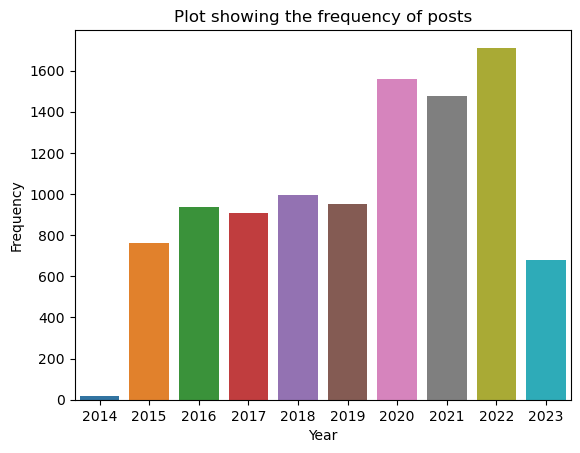

In [175]:
sns.countplot(x = insta.Date.dt.year)
plt.title('Plot showing the frequency of posts')
plt.xlabel('Year')
plt.ylabel('Frequency');

The plot below also shows the frequency of counts per month. It seems there are less posts in january,july and august. We can't conclude yet though until we dig deeper

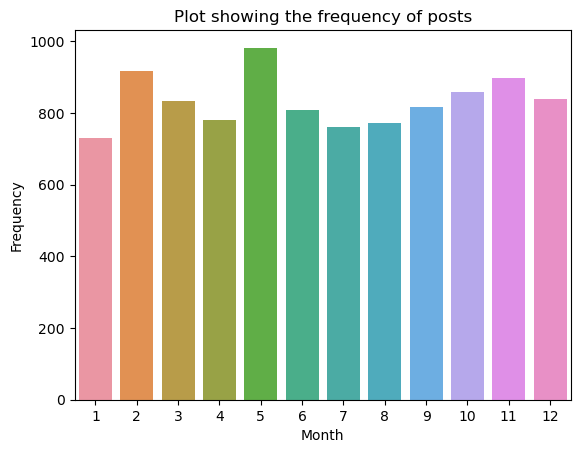

In [176]:
sns.countplot(x = insta.Date.dt.month)
plt.title('Plot showing the frequency of posts')
plt.xlabel('Month')
plt.ylabel('Frequency');

Taking a hourly level approach, we can see that there is a significant trend between 7am and 10pm with the peak around 10am. I would say that there is likely to be more Instagram posts during the work hours of the day

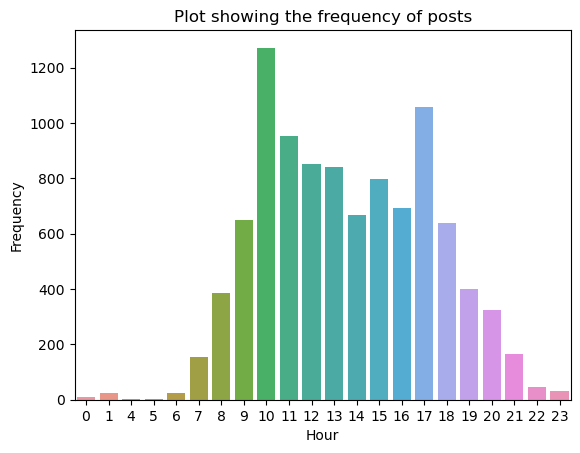

In [177]:
sns.countplot(x = insta.Date.dt.hour)
plt.title('Plot showing the frequency of posts')
plt.xlabel('Hour')
plt.ylabel('Frequency');

The plot below also has a pattern, there is a rise and fall in the frequency of posts in each month. More analysis could be done here

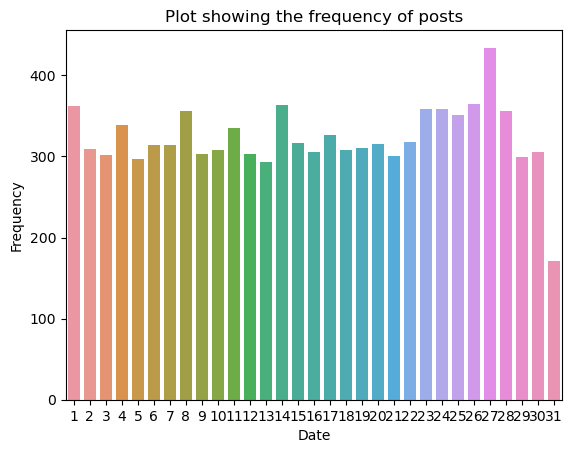

In [178]:
sns.countplot(x = insta.Date.dt.day)
plt.title('Plot showing the frequency of posts')
plt.xlabel('Date')
plt.ylabel('Frequency');

In pandas Monday is 0 while saturday is 6
The plot below shows that number of posts increases from monday to wednesday, keeps reducing and significantly reduces on saturday and sunday since they are weekends an workers are probably enjoying the weekend.

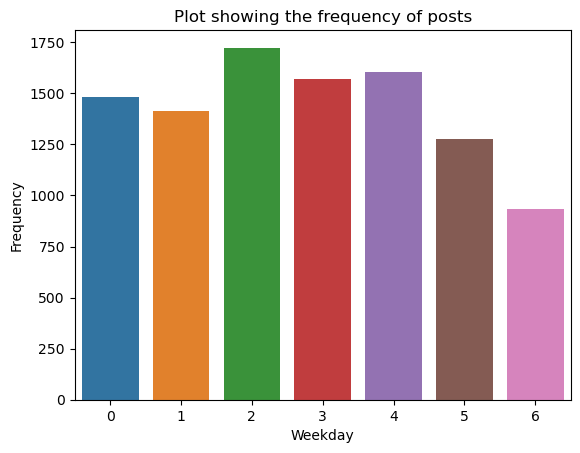

In [179]:
sns.countplot(x = insta.Date.dt.weekday)
plt.title('Plot showing the frequency of posts')
plt.xlabel('Weekday')
plt.ylabel('Frequency');


The visusalization below shows that in the entire dataset, the Photo content type seems to be prevalent than other forms of contents

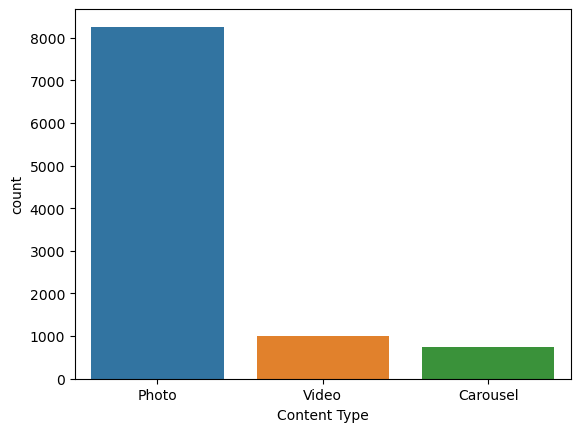

In [180]:
sns.countplot(x = 'Content Type', data = insta)
plt.savefig('content_types.jpg');

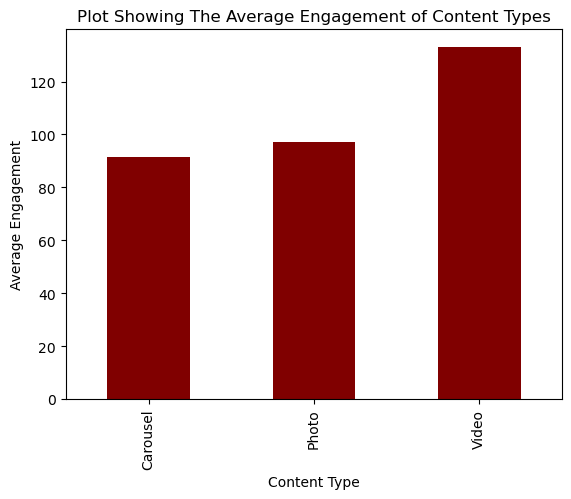

In [181]:
insta.groupby('Content Type')['Engagements'].mean().plot(kind = 'bar', color = 'maroon')
plt.title('Plot Showing The Average Engagement of Content Types')
plt.xlabel('Content Type')
plt.ylabel('Average Engagement')
plt.savefig('content_types_engagement.jpg');

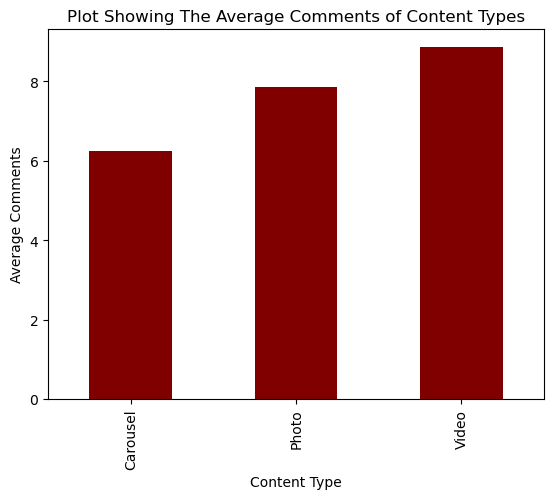

In [182]:
insta.groupby('Content Type')['Comments'].mean().plot(kind = 'bar', color = 'maroon')
plt.title('Plot Showing The Average Comments of Content Types')
plt.xlabel('Content Type')
plt.ylabel('Average Comments')
plt.savefig('content_types_comment.jpg');

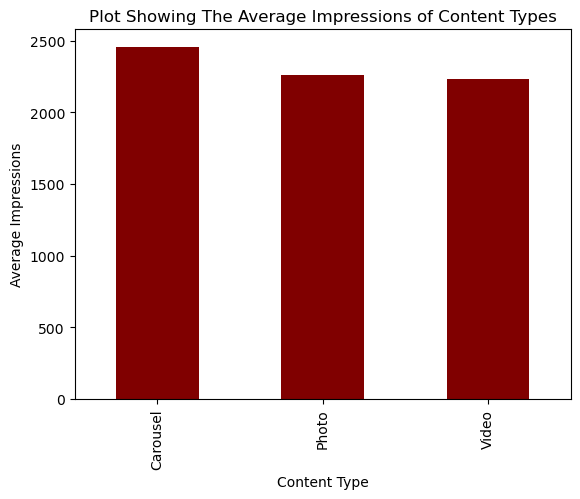

In [183]:
insta.groupby('Content Type')['Impressions'].mean().plot(kind = 'bar', color = 'maroon')
plt.title('Plot Showing The Average Impressions of Content Types')
plt.xlabel('Content Type')
plt.ylabel('Average Impressions')
plt.savefig('content_types_Impressions.jpg');

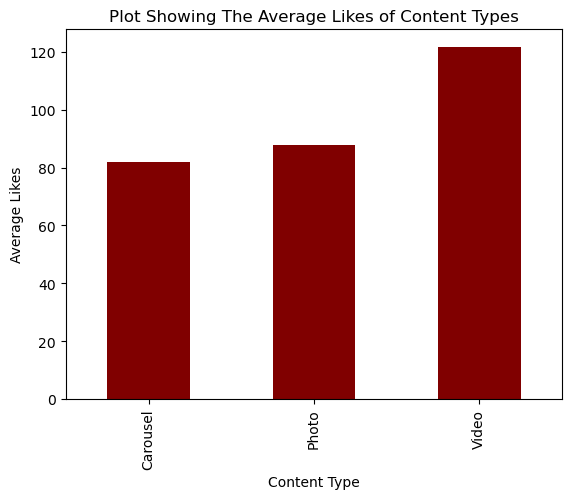

In [184]:
insta.groupby('Content Type')['Likes'].mean().plot(kind = 'bar', color = 'maroon')
plt.title('Plot Showing The Average Likes of Content Types')
plt.xlabel('Content Type')
plt.ylabel('Average Likes')
plt.savefig('content_types_Likes.jpg');

The plot below shows the admins who sent the posts and it can also be seen that most of the posts were sent by people whose names were not mentioned

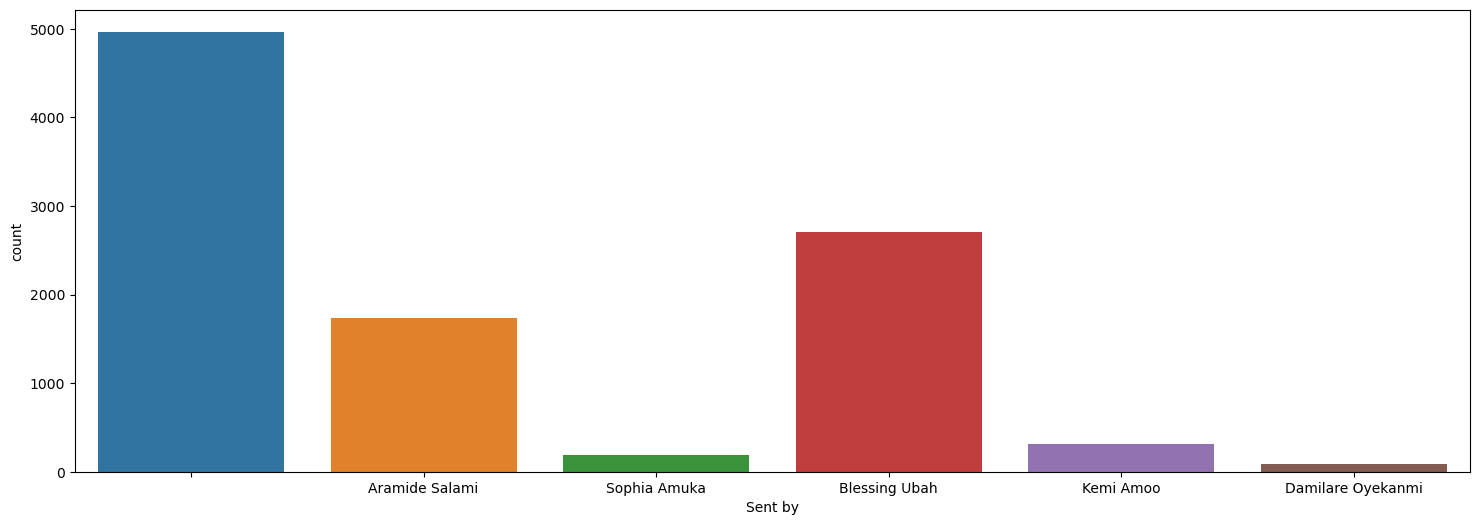

In [185]:
plt.figure(figsize=(18,6))
sns.countplot(x = 'Sent by', data = insta);

Let's take a look at the correlation between the columns in the dataset. It is important to identify if there are interactions or no interactions at all. This is a multivariate analysis step

As seen in the figure below, some of the columns have high correlation while some do not. The scale at the right (0-1) helps to guide the visuals. The columns with which are entirely white need to be dropped, they signify zero variance, hence do not change through out the dataset.

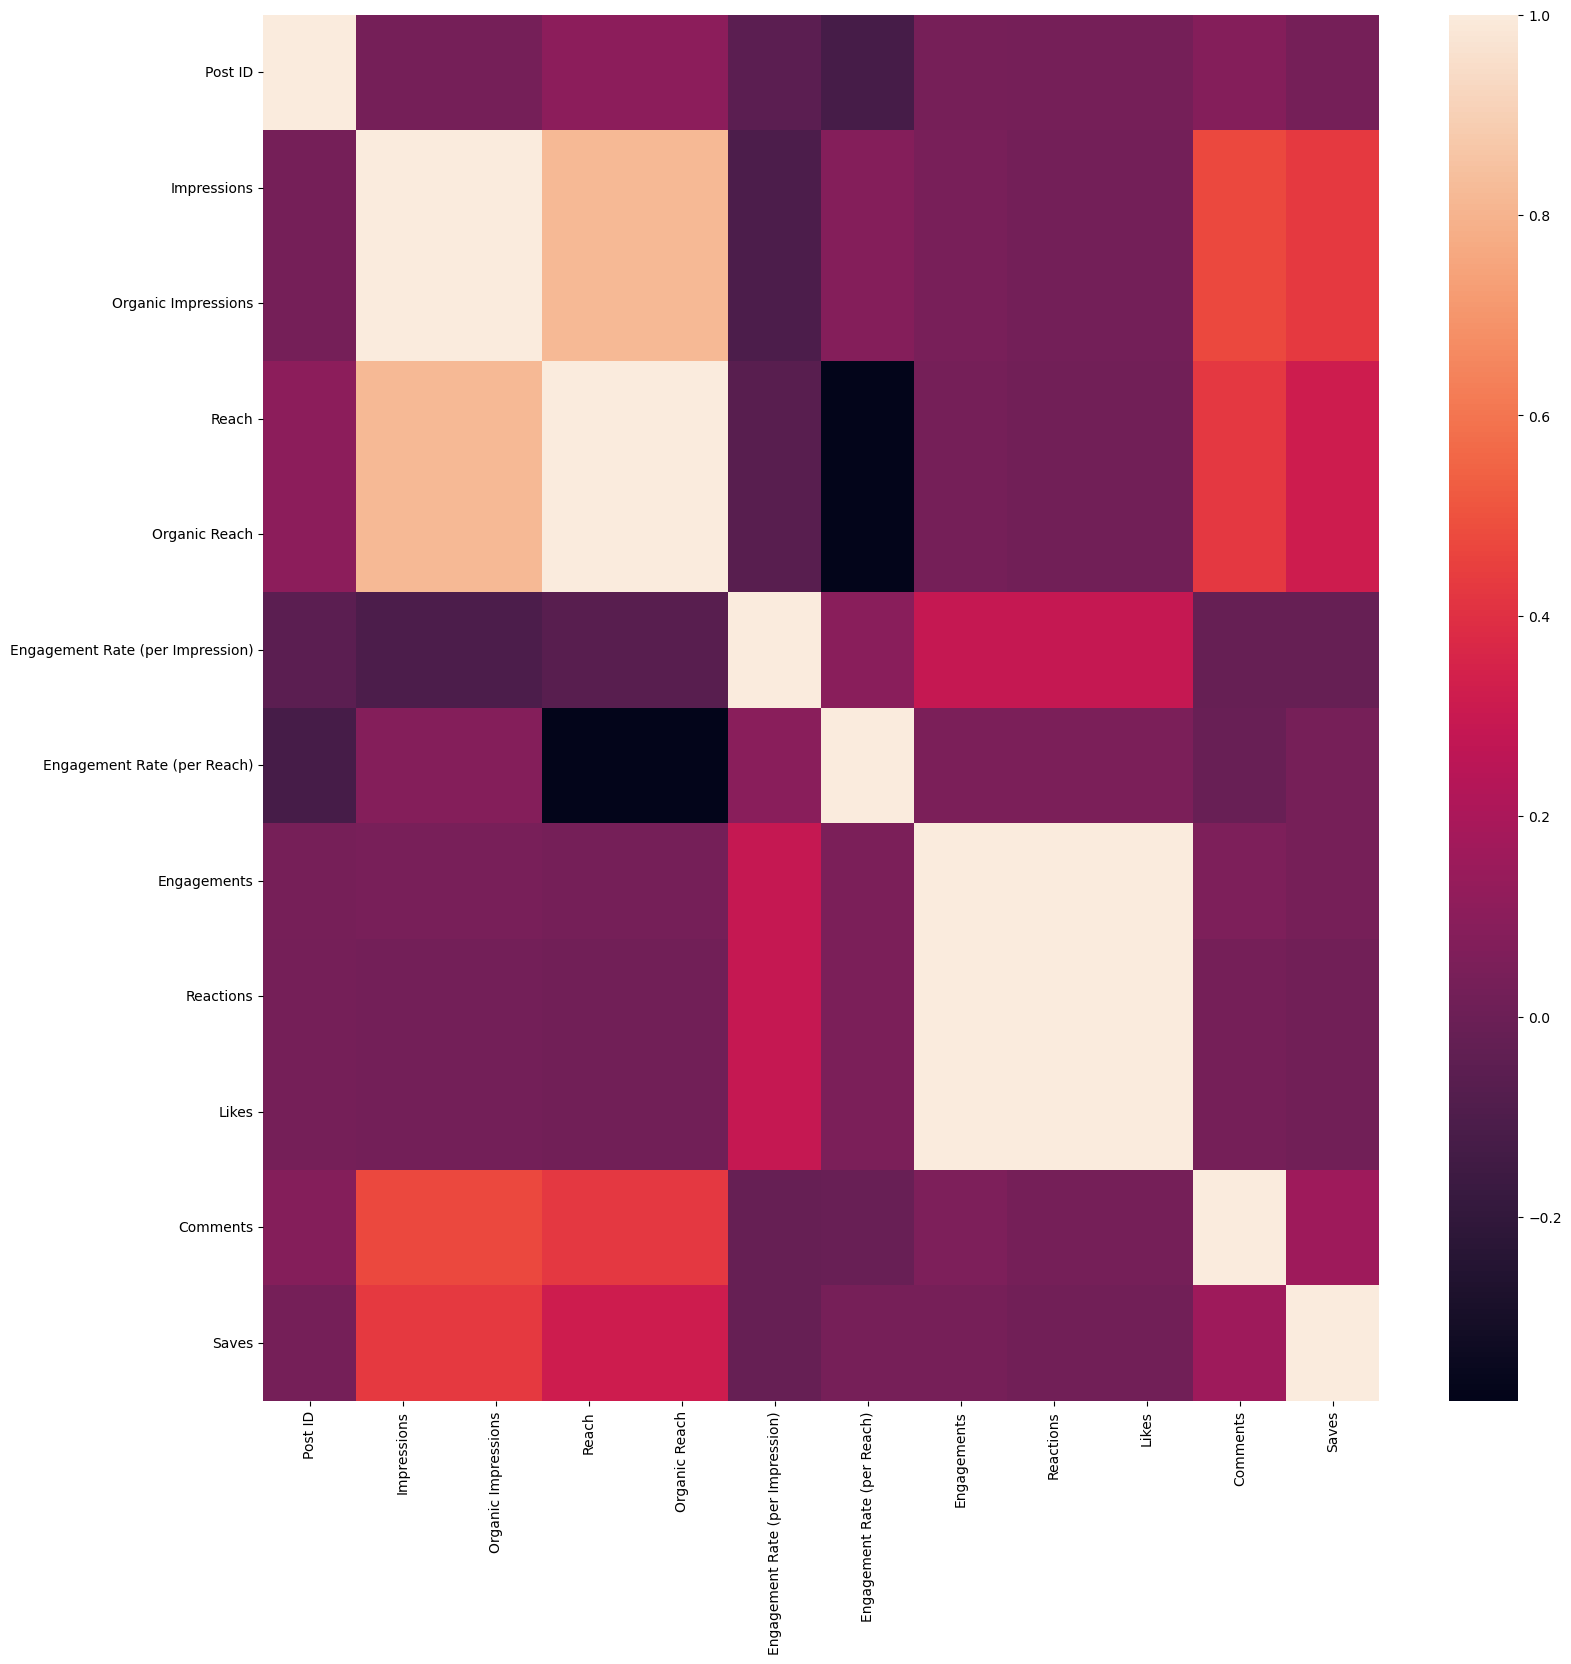

In [186]:
plt.figure(figsize=(18,18))
sns.heatmap(insta.corr());

Let's analyze the describe method for the dataset

Many columns have abnormal distributions, the mean is greater than the median, hence creating right-skewed distributions. For a good data science project, it is also good to work with a normal distribution. Not to worry, when creating models, the Standardization method in sklearn will be used

In [187]:
insta.describe()

,Post ID,Impressions,Organic Impressions,Reach,Organic Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Comments,Saves
count,1.000000e+04,8516.000000,8516.000000,8516.000000,8516.000000,8232.000000,7253.000000,10000.000000,10000.000000,10000.000000,10000.000000,8516.000000
mean,1.793491e+16,2273.855214,2273.855214,1503.111790,1503.111790,39.193321,1441.701223,100.463100,90.886800,90.886800,7.831000,2.049436
std,9.977627e+13,1742.647997,1742.647997,1769.934182,1769.934182,440.331452,3683.404873,791.492273,790.223494,790.223494,23.762633,8.445634
min,1.784149e+16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.786071e+16,1359.750000,1359.750000,2.000000,2.000000,2.340000,2.480000,34.000000,29.000000,29.000000,0.000000,0.000000
50%,1.790449e+16,1997.500000,1997.500000,1271.000000,1271.000000,3.030000,3.250000,56.000000,50.000000,50.000000,3.000000,1.000000
75%,1.796810e+16,2780.250000,2780.250000,2240.000000,2240.000000,3.970000,5.750000,88.000000,79.000000,79.000000,8.000000,3.000000
max,1.838963e+16,39681.000000,39681.000000,32418.000000,32418.000000,14200.000000,65600.000000,33395.000000,33394.000000,33394.000000,1033.000000,625.000000


In [188]:
#deriving a visualiztion for the first 12 numeric columns in the dataset

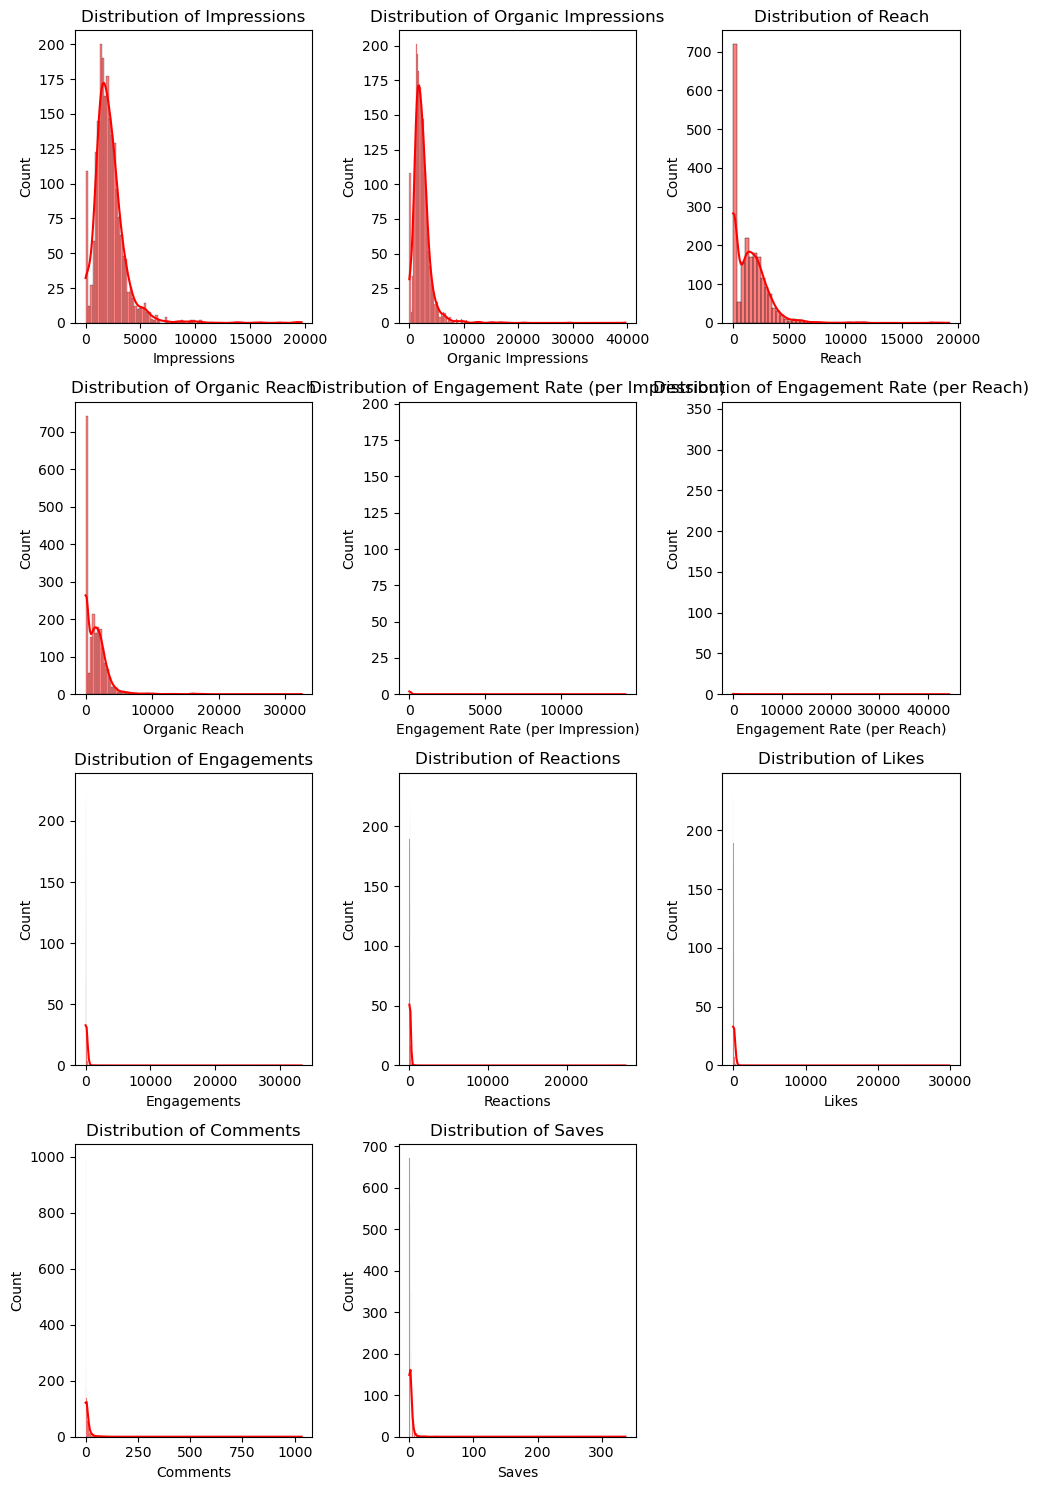

In [189]:
# Get a list of numeric columns in the dataset
numeric_columns = insta.select_dtypes('number').columns.to_list()[1:13]

# Define the number of rows and columns for the subplot grid
n_rows = 4
n_cols = 3

# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 15),)

# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

# Iterate through the numeric columns and plot distribution plots
for i, col in enumerate(numeric_columns):
    sns.histplot(insta.sample(2500)[col], ax=axes[i], kde=True, color = 'red')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)

# Remove any empty subplots
for i in range(len(numeric_columns), n_rows * n_cols):
    fig.delaxes(axes[i])

# Adjust the layout
plt.tight_layout()
plt.show()


In [190]:
#checking for null values present in the data
insta.isna().sum()

Date                                   0
Post ID                                0
Network                                0
Post Type                              0
Content Type                           0
Profile                                0
Sent by                                0
Link                                   0
Post                                  11
Impressions                         1484
Organic Impressions                 1484
Reach                               1484
Organic Reach                       1484
Engagement Rate (per Impression)    1768
Engagement Rate (per Reach)         2747
Engagements                            0
Reactions                              0
Likes                                  0
Comments                               0
Saves                               1484
dtype: int64

In [191]:
#recalculating the shape of the data
insta.shape

(10000, 20)

It is almost of no use if a lot of columns are empty per row, hence i used the thresh option in dropna to define a threshold. Upon meeting this threshold, any number of null values above will be dropped completely from the data

In [192]:
insta = insta.dropna(thresh = 5)

Next, I used the groupby method in pandas to group by the content type and find the average or mean of all the numeric colums. The purpose of this is to compare each content type and the average expected

In [193]:
insta.groupby('Content Type').mean()

,Post ID,Impressions,Organic Impressions,Reach,Organic Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Comments,Saves
Content Type,,,,,,,,,,,,
Carousel,1.794976e+16,2455.563187,2455.563187,1285.888736,1285.888736,3.610428,2039.025990,91.451482,81.827493,81.827493,6.254717,3.434066
Photo,1.793084e+16,2260.545800,2260.545800,1491.425080,1491.425080,46.167486,1504.434493,97.322311,87.967054,87.967054,7.847384,1.821627
Video,1.795745e+16,2230.535639,2230.535639,1752.593291,1752.593291,17.884782,621.199392,133.014970,121.652695,121.652695,8.863273,2.624738


As humans, the above table is just a bunch of weird numbers but a visualization can be plotted to understand it better and it is shown below

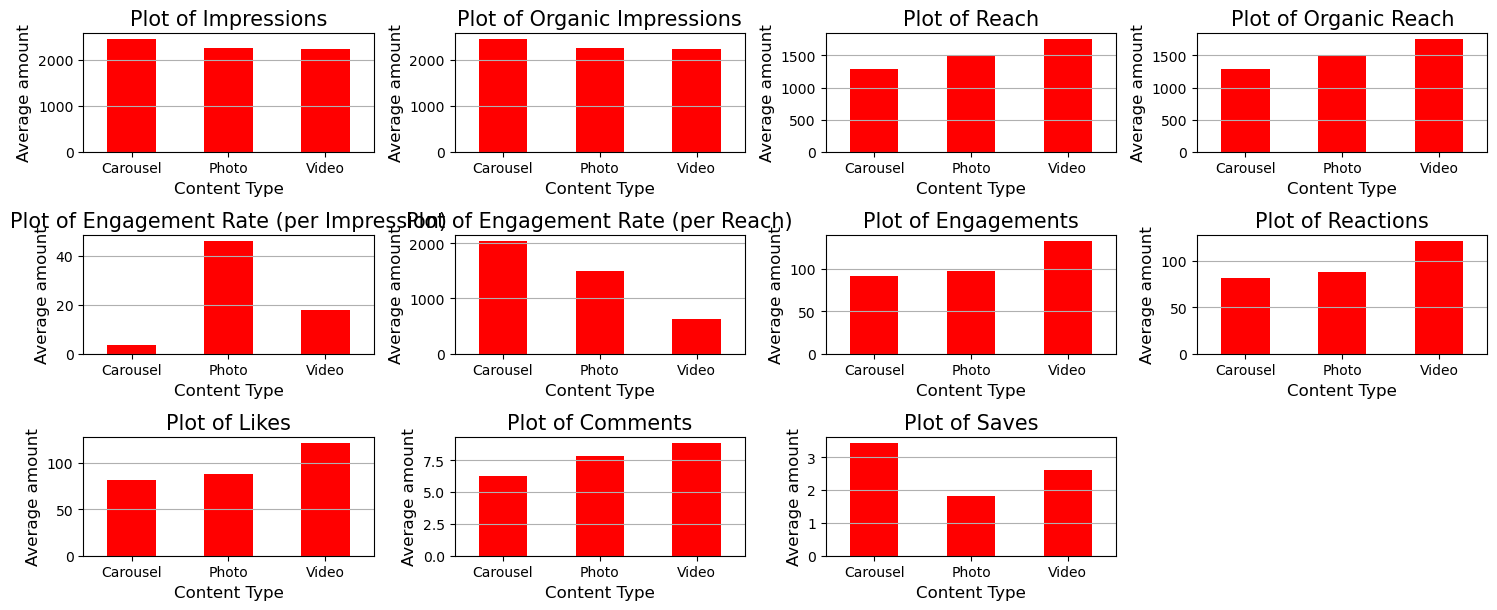

In [194]:
# Define the columns to plot (excluding 'Content Type')
columns_to_plot = insta.groupby('Content Type').mean().columns.to_list()[1:]

# Define the number of rows and columns for the subplot grid
n_rows = 15
n_cols = 4  # You can adjust this to 5x5 or any other size as needed

# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 30))

# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

# Iterate through the columns and plot each one
for i, col in enumerate(columns_to_plot):
    insta.groupby('Content Type').mean()[col].plot(kind='bar', color='red', ax=axes[i])
    axes[i].set_title(f'Plot of {col}', fontsize = 15)
    axes[i].set_ylabel('Average amount', fontsize = 12)
    axes[i].set_xlabel('Content Type', fontsize = 12)
    axes[i].tick_params(axis='x', labelrotation=0)
    axes[i].grid(axis='y')

# Remove any empty subplots
for i in range(len(columns_to_plot), n_rows * n_cols):
    fig.delaxes(axes[i])

# Adjust the layout
plt.tight_layout()
plt.show()


The above plot juxtaposes all of the numeric columns, based on the content type and mean. For example, the first plot shows the Plot of impressions. It can be seen that text has the highest impressions across board, followed by photos, link and videos. It means when people see texts, they is likely to be more impression rate.

Let's take a look at some of the posts that were sent

In [195]:
insta['Post'][-10:]

5637    With the Stanbic IBTC SME Online-Bento Redirec...
5664    Hey CEOs, it’s time to say goodbye to complexi...
5684    Together, we can make a difference and build a...
5679    Choose from our wide range of insurance option...
5166                   Tell us in the comments.\n#ITCANBE
5663                              Answer: China\n#ITCANBE
4599    Here are some mistakes you shouldn’t make duri...
5429    Sade was able to acquire a home loan and make ...
5638    Cheers to the self-taught masters! 💪🏿 \nLet us...
5772    Your money should not be a gamble. Before you ...
Name: Post, dtype: object

Each post have varied length, I calculated the length of each post and plotted the histogram below. The lenght of most posts is usually between 10 to 300 words in a singular post

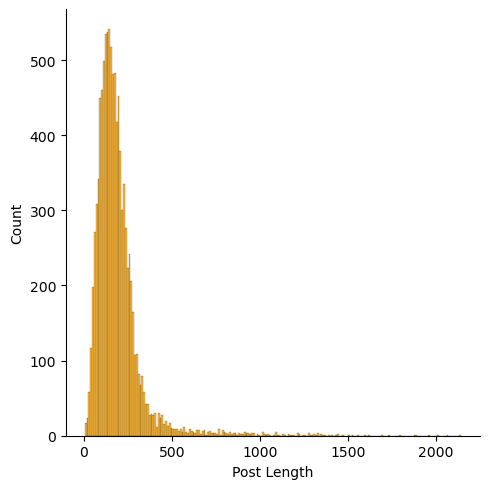

In [196]:
insta['Post Length'] = insta['Post'].str.len()
sns.displot(insta['Post Length'], color = 'orange');

In [197]:
# nltk.download('stopwords')

def clean_text(text):
    if isinstance(text, str):
        # Remove symbols and digits
        text = ''.join([char for char in text if char.isalpha() or char.isspace()])
        
        # Tokenize the text
        words = text.lower().split()
        
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        words = [word for word in words if word not in stop_words]
        
        return ' '.join(words)
    else:
        return ''  # Return an empty string for missing or non-string values




In [198]:
insta['Post'] = insta['Post'].apply(clean_text)


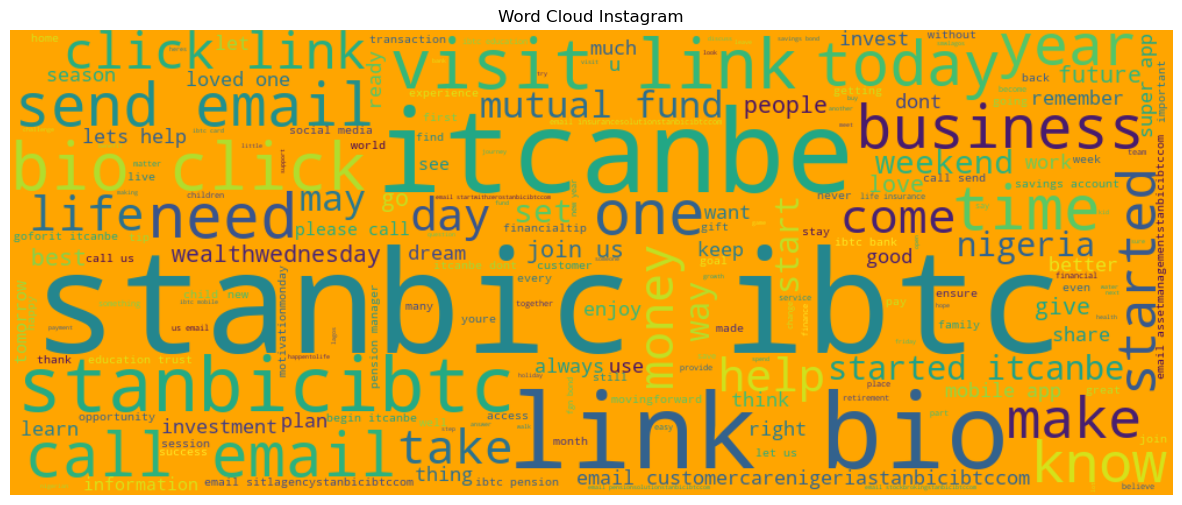

In [199]:
# Concatenate all cleaned text into a single string
all_cleaned_text = ' '.join(insta['Post'])

# Create a WordCloud object
wordcloud = WordCloud(width=1000, height=400, background_color='orange').generate(all_cleaned_text)

# Display the WordCloud
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Instagram')
plt.show()


It shows that stanbic ibtc, email, education, itcanbe,love, need, call, money, nigeria etc are often talked about in the posts

'Itcanbe' is present as much times as stanbic ibtc because 'itcanbe' is like a motto, which might also be referred to as hashtags in some social media websites

## Feature Engineering

In this section, I created date-related features and other features too

In [200]:
#deriving data related features

insta['year'] = insta['Date'].dt.year 
insta['quarter'] = insta['Date'].dt.quarter
insta['month'] = insta['Date'].dt.month
insta['day'] = insta['Date'].dt.day 
insta['hour'] = insta['Date'].dt.hour
insta['minute'] = insta['Date'].dt.minute
insta['weekdays'] = insta['Date'].dt.weekday

In [201]:
insta.isna().sum()

Date                                   0
Post ID                                0
Network                                0
Post Type                              0
Content Type                           0
Profile                                0
Sent by                                0
Link                                   0
Post                                   0
Impressions                         1484
Organic Impressions                 1484
Reach                               1484
Organic Reach                       1484
Engagement Rate (per Impression)    1768
Engagement Rate (per Reach)         2747
Engagements                            0
Reactions                              0
Likes                                  0
Comments                               0
Saves                               1484
Post Length                           11
year                                   0
quarter                                0
month                                  0
day             

In [202]:
# Calculate Engagement Ratio (Engagements per Impression)
insta['Engagement Ratio'] = insta['Engagements'] / insta['Impressions']

# Calculate Reach Ratio (Reach per Impression)
insta['Reach Ratio'] = insta['Reach'] / insta['Impressions']

# Calculate Reactions Ratio (Reactions per Engagement)
insta['Reactions Ratio'] = insta['Reactions'] / insta['Engagements']

# Calculate Comments Ratio (Comments per Engagement)
insta['Comments Ratio'] = insta['Comments'] / insta['Engagements']

# Calculate Saves Ratio (Shares per Engagement)
insta['Saves Ratio'] = insta['Saves'] / insta['Engagements']

# Calculate Average Engagement Rate (Average Engagement per Post)
average_engagement_rate = insta['Engagements'].mean()
insta['Average Engagement Rate'] = average_engagement_rate


# Calculate Impression Share
total_impressions = insta['Impressions'].sum()
insta['Organic Impression Share'] = insta['Organic Impressions'] / total_impressions


# Calculate Post Length (assuming a 'Post Content' column)
insta['Post Length'] = insta['Post'].str.len()

# Calculate total actions (total actions per Engagement)
insta['total actions per engagement'] = (insta['Reactions'] + insta['Comments'] + insta['Saves']) / insta['Engagements']



# Modelling [Machine Learning]

### Engagements Classification

The engagement can be predicted. In this section, i created a machine learning model, a classifier which classifies the engagements.

In [203]:
#replacing inf,np.nan values with zero
insta = insta.replace([np.inf,-np.inf],np.nan)
insta.fillna(0,inplace= True)

In [204]:
insta['Engagements'].describe()

count    10000.000000
mean       100.463100
std        791.492273
min          0.000000
25%         34.000000
50%         56.000000
75%         88.000000
max      33395.000000
Name: Engagements, dtype: float64

In [205]:
#binning the engagement column into three different classes
def binningEngagements(x):
    if x <= 50:
        return 0 #low engagement
    elif x > 50 and x <= 150:
        return 1 #medium engagement
    elif x > 150 :
        return 2 #high engagement
    else:
        return -1 #no engagement

In [206]:
insta['Engagements_Class'] = insta['Engagements'].apply(lambda x : binningEngagements(x))

In [207]:
insta['Engagements_Class'].value_counts()

1    4816
0    4378
2     806
Name: Engagements_Class, dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


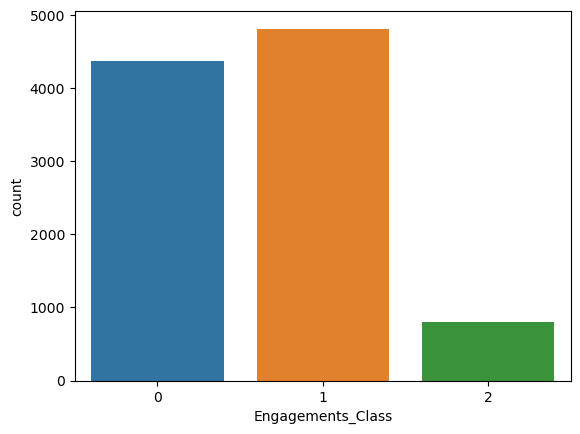

In [208]:
sns.countplot(insta['Engagements_Class']);

The countplot above shows that there are less data points in class 0

In [209]:
df_engage = insta.drop(columns = ['Date',	'Post ID',	'Network', 'Post Type','Profile',	'Sent by',
                               'Link', 'Post','Engagement Ratio','Engagements'])

In [210]:
le = LabelEncoder()

In [211]:
#encoding the content type column
df_engage['Content Type'] = le.fit_transform(df_engage['Content Type'])

In [212]:
df_engage.head(5)

,Content Type,Impressions,Organic Impressions,Reach,Organic Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Reactions,Likes,Comments,Saves,Post Length,year,quarter,month,day,hour,minute,weekdays,Reach Ratio,Reactions Ratio,Comments Ratio,Saves Ratio,Average Engagement Rate,Organic Impression Share,total actions per engagement,Engagements_Class
9999,1,0.0,0.0,0.0,0.0,0.0,0.0,7,7,0,0.0,90,2014,4,12,22,17,59,0,0.0,1.0,0.0,0.0,100.4631,0.0,0.0,0
9998,1,0.0,0.0,0.0,0.0,0.0,0.0,7,7,0,0.0,38,2014,4,12,23,10,38,1,0.0,1.0,0.0,0.0,100.4631,0.0,0.0,0
9997,1,0.0,0.0,0.0,0.0,0.0,0.0,6,6,0,0.0,81,2014,4,12,23,17,14,1,0.0,1.0,0.0,0.0,100.4631,0.0,0.0,0
9996,1,0.0,0.0,0.0,0.0,0.0,0.0,6,6,0,0.0,358,2014,4,12,24,10,28,2,0.0,1.0,0.0,0.0,100.4631,0.0,0.0,0
9995,1,0.0,0.0,0.0,0.0,0.0,0.0,6,6,0,0.0,130,2014,4,12,24,17,37,2,0.0,1.0,0.0,0.0,100.4631,0.0,0.0,0


In [213]:
X,y = df_engage.drop('Engagements_Class',axis = 1) , df_engage['Engagements_Class']

In [214]:
#splitting
xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state = 42, stratify = y)

In [215]:
lr = CatBoostClassifier(random_state = 42, iterations = 200)

In [216]:
#training
lr.fit(xtrain,ytrain)

Learning rate set to 0.34165
0:	learn: 0.6324634	total: 47.8ms	remaining: 9.51s
1:	learn: 0.4376271	total: 77.5ms	remaining: 7.68s
2:	learn: 0.3170167	total: 97.8ms	remaining: 6.42s
3:	learn: 0.2356165	total: 115ms	remaining: 5.66s
4:	learn: 0.1853454	total: 135ms	remaining: 5.26s
5:	learn: 0.1494736	total: 151ms	remaining: 4.89s
6:	learn: 0.1218354	total: 178ms	remaining: 4.91s
7:	learn: 0.1025919	total: 201ms	remaining: 4.82s
8:	learn: 0.0902321	total: 222ms	remaining: 4.72s
9:	learn: 0.0805967	total: 237ms	remaining: 4.51s
10:	learn: 0.0747623	total: 251ms	remaining: 4.32s
11:	learn: 0.0677425	total: 267ms	remaining: 4.18s
12:	learn: 0.0619713	total: 283ms	remaining: 4.07s
13:	learn: 0.0560993	total: 305ms	remaining: 4.05s
14:	learn: 0.0517941	total: 331ms	remaining: 4.08s
15:	learn: 0.0502737	total: 347ms	remaining: 3.99s
16:	learn: 0.0484787	total: 365ms	remaining: 3.93s
17:	learn: 0.0469667	total: 382ms	remaining: 3.87s
18:	learn: 0.0436036	total: 402ms	remaining: 3.83s
19:	learn

165:	learn: 0.0058669	total: 3.48s	remaining: 714ms
166:	learn: 0.0058336	total: 3.5s	remaining: 692ms
167:	learn: 0.0058257	total: 3.52s	remaining: 670ms
168:	learn: 0.0057731	total: 3.55s	remaining: 651ms
169:	learn: 0.0057009	total: 3.56s	remaining: 629ms
170:	learn: 0.0056819	total: 3.58s	remaining: 608ms
171:	learn: 0.0056581	total: 3.6s	remaining: 586ms
172:	learn: 0.0056553	total: 3.61s	remaining: 564ms
173:	learn: 0.0056381	total: 3.63s	remaining: 542ms
174:	learn: 0.0055980	total: 3.65s	remaining: 522ms
175:	learn: 0.0055734	total: 3.68s	remaining: 501ms
176:	learn: 0.0055449	total: 3.69s	remaining: 480ms
177:	learn: 0.0055249	total: 3.71s	remaining: 459ms
178:	learn: 0.0055226	total: 3.73s	remaining: 438ms
179:	learn: 0.0055012	total: 3.75s	remaining: 417ms
180:	learn: 0.0054745	total: 3.77s	remaining: 395ms
181:	learn: 0.0054685	total: 3.78s	remaining: 374ms
182:	learn: 0.0054550	total: 3.81s	remaining: 354ms
183:	learn: 0.0054448	total: 3.83s	remaining: 333ms
184:	learn: 0.

In [217]:
pred = lr.predict(xtest)

In [218]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1095
           1       0.99      0.99      0.99      1204
           2       0.98      0.97      0.97       201

    accuracy                           0.99      2500
   macro avg       0.99      0.99      0.99      2500
weighted avg       0.99      0.99      0.99      2500



From the classfication report above, it can be seen that there is about 99% accuracy and a high score for f1-score too

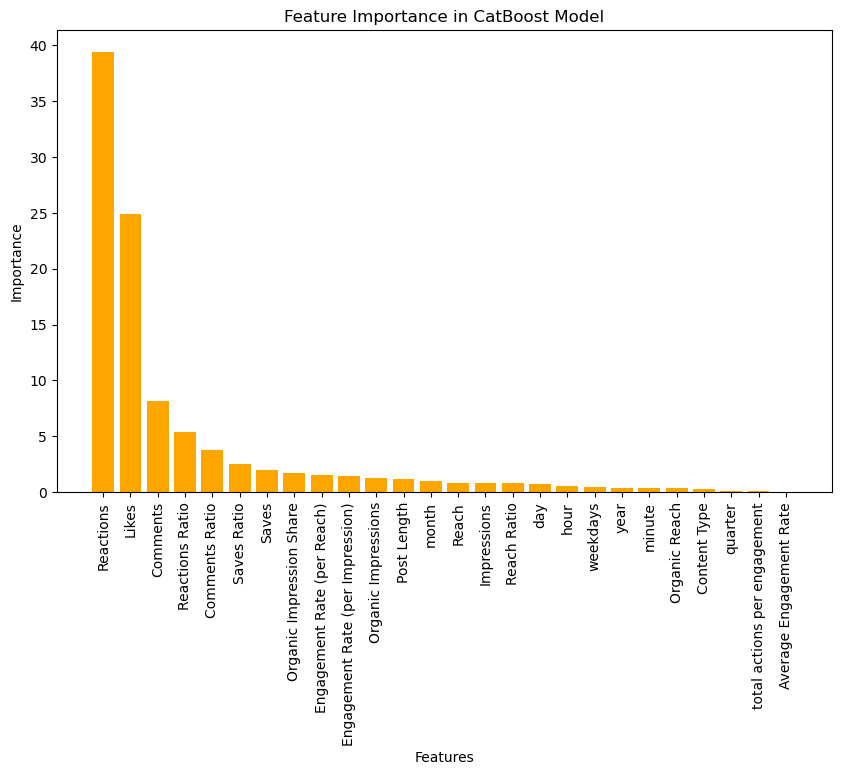

In [219]:
#feature importance
feature_importance = lr.get_feature_importance()
feature_names = X.columns

# Creating a DataFrame to store feature importance results
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})

# Sorting the DataFrame by feature importance values
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.bar(importance_df['feature'], importance_df['importance'],color = 'orange')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in CatBoost Model')
plt.show()

### Engagement Rate Regression Prediction

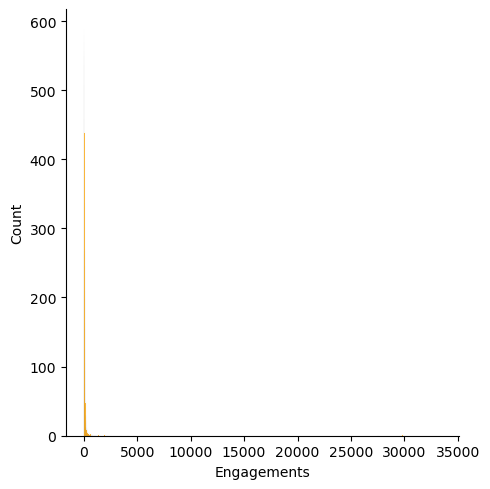

In [220]:
sns.displot(insta['Engagements'],color = 'orange');

The above shows that the data is greatly right-skewed and its not going to be very ideal for the machine learning model. It has to be corrected

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


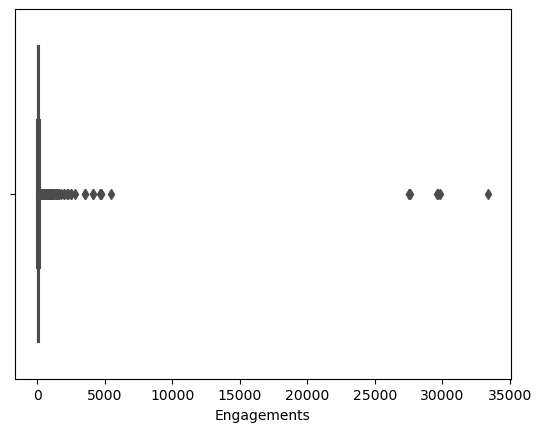

In [221]:
sns.boxplot(insta['Engagements'], color = 'orange');

In [222]:
#dropping engagements less than 5000
insta = insta[insta['Engagements'] < 1000]

In [223]:
df_engage = insta.drop(columns = ['Date',	'Post ID',	'Network', 'Post Type','Profile',	'Sent by', 'Link', 'Post','Engagement Ratio','Engagements_Class'])

In [224]:
le = LabelEncoder()

In [225]:
df_engage['Content Type'] = le.fit_transform(df_engage['Content Type'])

In [226]:
df_engage.head(5)

,Content Type,Impressions,Organic Impressions,Reach,Organic Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Comments,Saves,Post Length,year,quarter,month,day,hour,minute,weekdays,Reach Ratio,Reactions Ratio,Comments Ratio,Saves Ratio,Average Engagement Rate,Organic Impression Share,total actions per engagement
9999,1,0.0,0.0,0.0,0.0,0.0,0.0,7,7,7,0,0.0,90,2014,4,12,22,17,59,0,0.0,1.0,0.0,0.0,100.4631,0.0,0.0
9998,1,0.0,0.0,0.0,0.0,0.0,0.0,7,7,7,0,0.0,38,2014,4,12,23,10,38,1,0.0,1.0,0.0,0.0,100.4631,0.0,0.0
9997,1,0.0,0.0,0.0,0.0,0.0,0.0,6,6,6,0,0.0,81,2014,4,12,23,17,14,1,0.0,1.0,0.0,0.0,100.4631,0.0,0.0
9996,1,0.0,0.0,0.0,0.0,0.0,0.0,6,6,6,0,0.0,358,2014,4,12,24,10,28,2,0.0,1.0,0.0,0.0,100.4631,0.0,0.0
9995,1,0.0,0.0,0.0,0.0,0.0,0.0,6,6,6,0,0.0,130,2014,4,12,24,17,37,2,0.0,1.0,0.0,0.0,100.4631,0.0,0.0


In [227]:
X,y = df_engage.drop('Engagements',axis = 1) , df_engage['Engagements']

In [228]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state = 42)

In [229]:
lr = CatBoostRegressor(random_state = 42, iterations = 200, verbose = False)

In [230]:
lr.fit(xtrain,ytrain)

In [231]:
pred = lr.predict(xtest)

In [232]:
mean_absolute_error(ytest,pred)

1.3899043039241266

In [233]:
np.sqrt(mean_squared_error(ytest,pred))

6.8738086978702455

from the mean absolute error and root means squared error, we can see that the scores are very fair.

For the modelling section,  a better model could be created upon speaking with the organizers of this competition to see their business needs. Knowing the business need can help to guide on creating a very robust model

In [234]:
os.makedirs('../cleaned_datasets', exist_ok = True)

In [235]:
insta.to_csv('../cleaned_datasets/instagram_cleaned.csv',index = False)